# 1. A simple SDE model

### About this notebook

This notebook was used in the 50.039 Deep Learning course at the Singapore University of Technology and Design.

**Author:** Matthieu DE MARI (matthieu_demari@sutd.edu.sg)

**Version:** 1.0 (08/04/2023)

**Requirements:**
- Python 3 (tested on v3.9.6)
- Matplotlib (tested on v3.6.2)
- Numpy (tested on v1.23.5)
- Torch (tested on v1.12.1)

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

### Running simulations following a Brownian motion SDE

In [3]:
# Parameters
num_simulations = 5
total_time = 10.0
num_steps = 1000
dt = total_time/num_steps

In [4]:
# Initialize the state variable as 0, at t = 0
x = np.zeros((num_simulations, num_steps))
x[:, 0] = 0.0

# Simulate Brownian motion
for t in range(1, num_steps):
    # Definition random motion using a Normal distribution with
    # Zero mean and variance sqrt(dt)
    dW = np.random.normal(0, np.sqrt(dt), size = num_simulations)
    x[:, t] = x[:, t-1] + dW

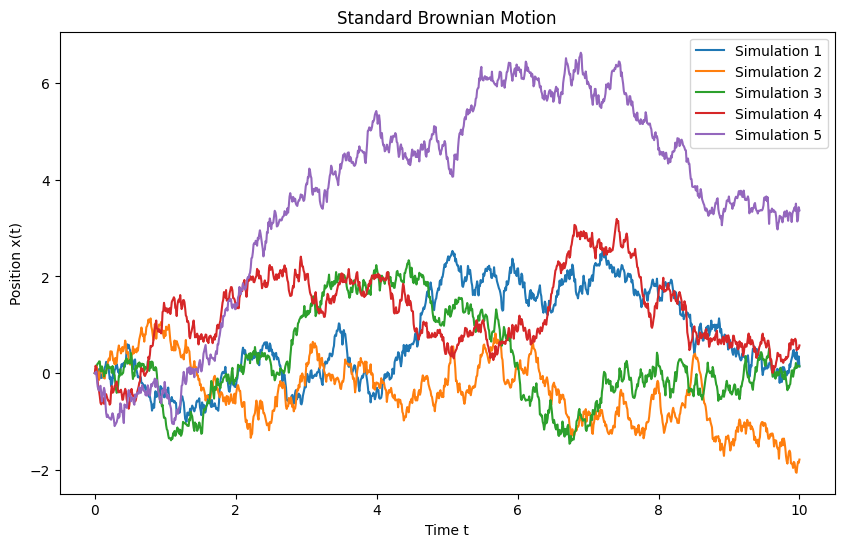

In [5]:
# Plot all the simulated Brownian motion paths
plt.figure(figsize = (10, 6))
for i in range(num_simulations):
    plt.plot(np.linspace(0, total_time, num_steps), x[i, :], label = f'Simulation {i+1}')
plt.xlabel('Time t')
plt.ylabel('Position x(t)')
plt.title('Standard Brownian Motion')
plt.legend(loc = "best")
plt.show()

### Running simulations following an SDE with a drift term

In [6]:
# Parameters
num_simulations = 5
total_time = 10.0
num_steps = 1000
dt = total_time / num_steps

In [7]:
# Define the drift term
def drift(x, t):
    return 0.1*x

In [8]:
# Initialize the state variable
x = np.zeros((num_simulations, num_steps))
x[:, 0] = 10.0  # Initial condition

# Simulate the SDE
for t in range(1, num_steps):
    dW = np.random.normal(0, np.sqrt(dt), size = num_simulations)
    dx = drift(x[:, t-1], t*dt)*dt + dW
    x[:, t] = x[:, t-1] + dx

In [9]:
xr = np.zeros((1, num_steps)).reshape(num_steps)
xr[0] = 10.0
for t in range(1, num_steps):
    dx = drift(xr[t-1], t*dt)*dt
    xr[t] = xr[t-1] + dx

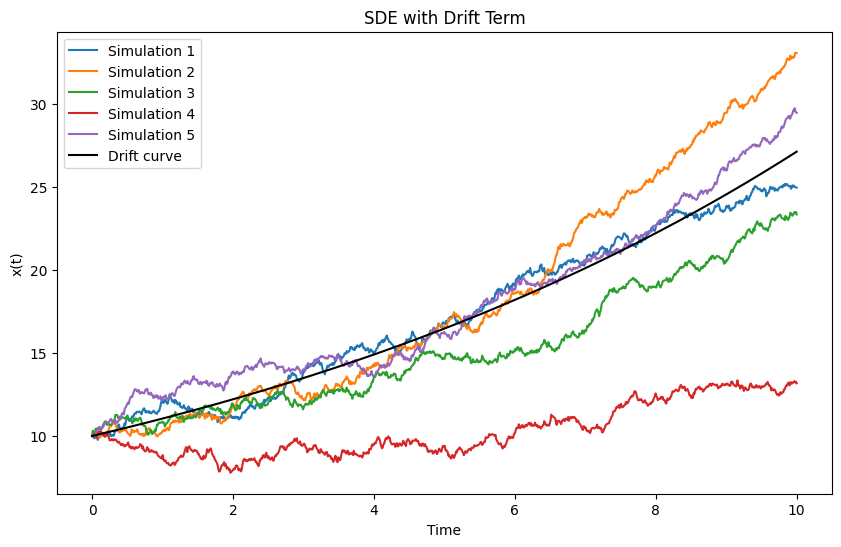

In [10]:
# Plot the simulated SDE paths
plt.figure(figsize = (10, 6))
for i in range(num_simulations):
    plt.plot(np.linspace(0, total_time, num_steps), x[i, :], label = f'Simulation {i+1}')
plt.plot(np.linspace(0, total_time, num_steps), xr, c = 'k', label = "Drift curve")
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.title('SDE with Drift Term')
plt.legend()
plt.show()